In [8]:


url_stopwords_ru = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"




url='https://ru.wikipedia.org/wiki/%D0%A2%D0%BE%D0%BB%D1%81%D1%82%D0%BE%D0%B9,_%D0%9B%D0%B5%D0%B2_%D0%9D%D0%B8%D0%BA%D0%BE%D0%BB%D0%B0%D0%B5%D0%B2%D0%B8%D1%87'
text = get_text(url)
words = tokenize_n_lemmatize(text, stopwords=stopwords_ru)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:

# import tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer.fit_transform(words)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn(


<55556x7208 sparse matrix of type '<class 'numpy.float64'>'
	with 55556 stored elements in Compressed Sparse Row format>

Total news: 410
Unique tags:
dict_keys(['Политика', 'Общество', 'Финансы', 'Экономика', 'Маркетинг', 'PR', 'HR', 'Криптовалюты', 'Учет и налогообложение', 'Компании', 'Рынки', 'Бизнес', 'Технологии', 'Автоматизация', 'Мобилизация', 'Медиа', 'Бухгалтеру', 'Работодателю', 'Вебинары для бухгалтеров', 'Банкротство', 'Кредитование', 'Инвестиции', 'Банки', 'Санкции 2022', 'Трудовое право', 'Общее', 'Карьера', 'Авто', 'Политика / Армия и спецслужбы', 'Интернет и IT', 'Экономика России', 'IT-компании', 'Электронные трудовые книжки', 'ЕГАИС', 'Налоги, взносы, пошлины', 'ЭДО', 'НДФЛ', 'АУСН', 'Перевозка', 'Отчетность в ПФР', 'Мошенничество', 'Первичные документы', 'Экономические преступления', 'ПСН', 'Онлайн-кассы'])


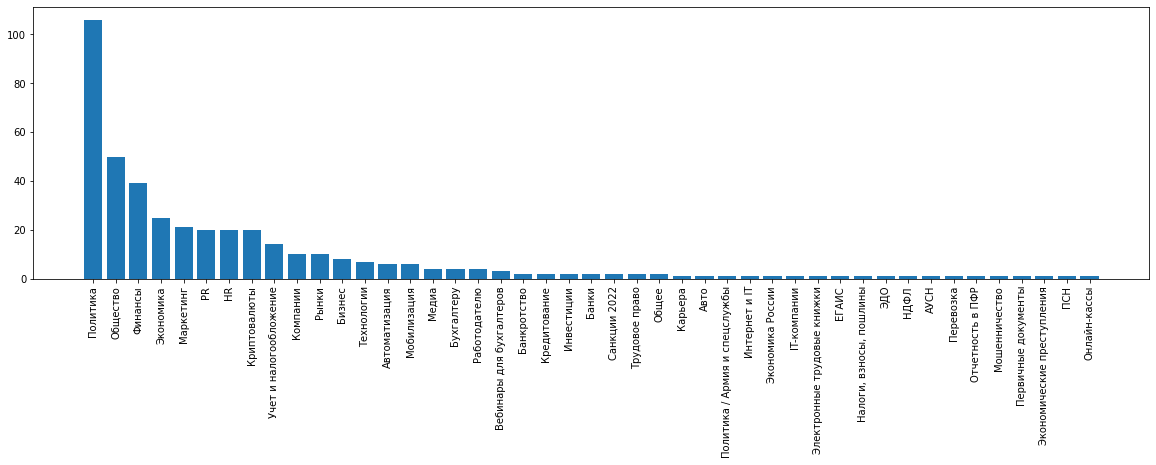

In [13]:
import feedparser

# SOURCES = {
#     # Habr
#     # 'habr': 'https://habr.com/ru/rss/all/all/?fl=ru',

#     # Rubase
#     ## By companies
#     # 'rb_chance': "https://rb.ru/feeds/tag/chance/",
#     # 'rb_vk': "https://rb.ru/feeds/tag/vk/",
#     'rb_rvc': "https://rb.ru/feeds/tag/rvc/",
#     # 'rb_yandex': "https://rb.ru/feeds/tag/yandex/",
#     'rb_skolkovo': "https://rb.ru/feeds/tag/skolkovo/",
#     # 'rb_facebook': "https://rb.ru/feeds/tag/facebook/",
#     'rb_mailru': "https://rb.ru/feeds/tag/mailru/",
#     # 'rb_microsoft': "https://rb.ru/feeds/tag/microsoft/",

#     ## By topics
#     'rb_advertising': "https://rb.ru/feeds/tag/advertising/",
#     # 'rb_robotics': "https://rb.ru/feeds/tag/robotics/",
#     # 'rb_it': "https://rb.ru/feeds/tag/it/",
#     # 'rb_bigdata': "https://rb.ru/feeds/tag/bigdata/",
#     'rb_china': "https://rb.ru/feeds/tag/china/",
#     'rb_finance': "https://rb.ru/feeds/tag/fintech/",
#     # 'rb_cloud': "https://rb.ru/feeds/tag/cloud/",

#     # Vedomosti
#     # 'vd_business': "https://www.vedomosti.ru/rss/rubric/business",
#     # 'vd_it_business': "https://www.vedomosti.ru/rss/rubric/it_business",
#     # 'vd_finance': "https://www.vedomosti.ru/rss/rubric/finance",
#     # 'vd_opinion': "https://www.vedomosti.ru/rss/rubric/opinion",
#     # 'vd_analytics': "https://www.vedomosti.ru/rss/rubric/opinion/analytics",


#     # RT
#     # 'rt': "https://russian.rt.com/rss/",
# }


SOURCES = {
    # "rt": "https://russian.rt.com/rss",
    "vd": "https://www.vedomosti.ru/rss/news",

    # for buhgalter
    "buh": "https://buh.ru/rss/?chanel=news",
    "klerk": "https://www.klerk.ru/export/news.rss",
    "audit-it": "http://www.audit-it.ru/rss/news_all.xml",
    # "rb": "https://rb.ru/feeds/all/",

    # for business owner
    # "rb": "https://rb.ru/feeds/all/",
    "rb_pr": "https://rb.ru/feeds/tag/pr/",
    "rb_finance": "https://rb.ru/feeds/tag/fintech/",
    "rb_hr": "https://rb.ru/feeds/tag/hr/",
    "rb_crypto": "https://rb.ru/feeds/tag/crypto/",
    "rb_marketing": "https://rb.ru/feeds/tag/marketing/",
    "rmblr_finance": "https://finance.rambler.ru/rss/economics/",
    "rmblr_business": "https://finance.rambler.ru/rss/business/",
    "rmblr_markets": "https://finance.rambler.ru/rss/markets/",
}

rb_topics = {
    "rb_pr":"PR",
    "rb_finance":"Финансы",
    "rb_hr":"HR",
    "rb_crypto":"Криптовалюты",
    "rb_marketing":"Маркетинг",
}

class RSSParser:
    def __init__(self, sources: dict[str,str]):
        self.sources = sources

    def fetch_entries(self) -> list[dict]:
        entries = []
        for source, url in self.sources.items():
            feed = feedparser.parse(url)
            # If there is no tags for entries, skip source and print warning
            if not feed['entries'][0].get('tags') and source not in rb_topics:
                print(f"Warning: No tags for source {source}")
                continue

            for entry in feed['entries']:
                entry['source'] = source
                entries.append(entry)
        return entries

    def standardize_general(self, entry: dict) -> dict:
        """ Turns entry to a standardized format

        Args:
            entry (dict): entry from feedparser

        Returns:
            dict: standardized entry in a format:
        {
            'source': str,
            'title': str,
            'url':  str,
            'date': timestamp with zone,
            'tags': list[str],
            'text': str,
        }
        """
        entry =  {
            'source': entry['source'],
            'title': entry['title'].replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').strip(),
            'url':  entry['link'],
            'date': entry['published_parsed'],
            'tags': [tag['term'] for tag in entry['tags']] if 'tags' in entry else [rb_topics[entry['source']]] if entry['source'] in rb_topics else [],
            'text': entry['summary'] if 'summary' in entry else '',
        }
        # pprint(entry)

        return entry

    def get_last_standardized_news(self) -> list[dict]:
        entries = self.fetch_entries()
        return [self.standardize_general(entry) for entry in entries]


if __name__ == '__main__':
    parser = RSSParser(SOURCES)
    from pprint import pprint
    news = parser.get_last_standardized_news()

    # Count every tag occurence
    tags = {}
    for entry in news:
        for tag in entry['tags']:
            if tag not in tags:
                tags[tag] = 0
            tags[tag] += 1

    # Plot tag distribution
    import matplotlib.pyplot as plt
    # Sort by value
    # Set plot size
    plt.rcParams["figure.figsize"] = (20,5)
    tags = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1], reverse=True)}
    plt.bar(tags.keys(), tags.values())


    print(f"Total news: {len(news)}")

    # Print unique tags
    print("Unique tags:")
    print(tags.keys())

    plt.xticks(rotation=90)
    plt.show()




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
news = parser.get_last_standardized_news()
print(f"Total news: {len(news)}")

Total news: 410


In [23]:
# Concatenate all titles and texts in news
all_text = ' '.join([entry['title'] + ' ' + entry['text'] for entry in news])
print(f'len: {len(all_text)}, words: {len(all_text.split())}')

len: 82812, words: 11034


In [25]:
# Prepare
words = tokenize_n_lemmatize(all_text, stopwords_ru)

In [26]:
# Train TF_IDF model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stopwords_ru)


X = vectorizer.fit_transform(words)
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn(


<6747x2650 sparse matrix of type '<class 'numpy.float64'>'
	with 6747 stored elements in Compressed Sparse Row format>

In [27]:
from navec import Navec
from slovnet import NER
from natasha import (
    Segmenter,
    NewsEmbedding,
    NewsMorphTagger,
    Doc
)

class NERParser:
    def __init__(self, navec_weights: str, ner_weights: str) -> None:
        self.navec = Navec.load(navec_weights)
        self.ner = NER.load(ner_weights)
        self.ner.navec(self.navec)
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)
        self.segmenter = Segmenter()

    def get_ners_dict(self, text: str) -> dict:
        """ Returns a dictionary of named entities in a text
            Args:
                text (str): text to parse
                ner_model (slovnet.NER): ner model

            Returns:
                dict: dictionary of named entities in a text
            """
            # Use this function with pandarallel's parallel_apply
        if not text:
            return {'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': []}
        markup = self.ner(text)
        ORGS, PERS, LOCS = [], [], []
        for span in markup.spans:
            span_text = markup.text[span.start:span.stop]
            {
                'ORG': ORGS,
                'PER': PERS,
                'LOC': LOCS,

            }[span.type].append(span_text)
            # print(span.type, span_text)
        # Получить существительные из текста
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        nouns = [_.text for _ in doc.tokens if _.pos == 'NOUN']
        # print(nouns)
        return {'ORGs': ORGS if ORGS else [], 'PERs': PERS if PERS else [], 'LOCs': LOCS if LOCS else [], 'NOUs': nouns}




ner = NERParser(
    r"S:\Workspace\MORETECH\nlp-workbench\models\navec_news_v1_1B_250K_300d_100q.tar",
    r"S:\Workspace\MORETECH\nlp-workbench\models\slovnet_ner_news_v1.tar",
)

In [41]:
%pip install razdel

Note: you may need to restart the kernel to use updated packages.


In [60]:

import os
import requests
from pathlib import Path
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import pymorphy2
from razdel import tokenize
from collections import Counter

nltk.download('punkt')

# https://ru.stackoverflow.com/questions/995616/%D0%9A%D0%B0%D0%BA-%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C-tf-idf-%D0%B4%D0%BB%D1%8F-%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2

def get_text(url, encoding='utf-8', to_lower=True):
    url = str(url)
    if url.startswith('http'):
        r = requests.get(url)
        if not r.ok:
            r.raise_for_status()
        return r.text.lower() if to_lower else r.text
    elif os.path.exists(url):
        with open(url, encoding=encoding) as f:
            return f.read().lower() if to_lower else f.read()
    else:
        raise Exception('parameter [url] can be either URL or a filename')

stopwords_ru = get_text(url_stopwords_ru).splitlines()


def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]


def remove_stopwords(tokens, stopwords=None, min_length=4):
    if not stopwords:
        return tokens
    stopwords = set(stopwords)
    tokens = [tok
              for tok in tokens
              if tok not in stopwords and len(tok) >= min_length]
    return tokens


def tokenize_n_lemmatize(
    text, stopwords=None, normalize=True,
    regexp=r'(?u)\b\w{4,}\b'):
    words = [w for sent in sent_tokenize(text)
             for w in regexp_tokenize(sent, regexp)]
    if normalize:
        words = normalize_tokens(words)
    if stopwords:
        words = remove_stopwords(words, stopwords)
    return words

import pandas as pd
# from scripts.ner_parser import NERParser
# from scripts.rss_parser import RSSParser, SOURCES
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    Doc
)

class Lemmatizer:
    def __init__(self) -> None:
        self.segmenter = Segmenter()
        self.morph_vocab = MorphVocab()
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)


    def lemmatize(self, text: str) -> list[str]:
        """ Lemmatizes a text
        Args:
            text (str): text to lemmatize

        Returns:
            list[str]: list of lemmas
        """
        # Use this function with pandarallel's parallel_apply
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        for token in doc.tokens:
            token.lemmatize(self.morph_vocab)
        return [_.lemma for _ in doc.tokens]


def make_lemmatize(lemmatizer: Lemmatizer):
    def lemmatize_word(word: str) -> str:
        # Название в два слова должно остаться названием в два слова
        if len(word.split(' ')) > 1:
            return ' '.join([ lemmatizer.lemmatize(word)[0] for word in word.split(' ') ])
        else:
            return lemmatizer.lemmatize(word)[0]

    return lemmatize_word



def get_best_ranked_words(x: str, fitted_vectorizer, n:int) -> list[str]:
    # Use TF-IDF to get best ranked words
    # Conactenate all words in one list
    # Split into words with razdel
    x = tokenize_n_lemmatize(x, stopwords=stopwords_ru)
    # Get TF-IDF matrix
    X = fitted_vectorizer.transform(x)
    # Get TF-IDF values
    tfidf = X.toarray()
    # Get words
    words = fitted_vectorizer.get_feature_names()
    # Get best ranked words
    best_ranked_words = [words[i] for i in tfidf.argsort()[0][-n:]]
    return best_ranked_words

# def get_trends(news_: pd.DataFrame, ner: NERParser, lemmatizer: Lemmatizer) -> pd.DataFrame:
def get_trends(news_: list[dict[str,str]], ner: NERParser, lemmatizer: Lemmatizer, convert_to_df: bool = True) -> list[dict[str, int]]:
    """ Get trends from news"""
    news = news_.copy()
    if convert_to_df:
        news = sorted(news, key=lambda x: x['date'], reverse=True)
        news = pd.DataFrame(news)

    # 1. Get NERs and nouns
    news['ners'] = news['text'].apply(ner.get_ners_dict)

    # 2. Split extracted words
    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
        news[ner_type] = news['ners'].apply(lambda x: x[ner_type])

    # 2.1 Add fifth column - VALs - put 3 best ranked word from extracted words on TF-IDF
    print("Vectorizer...")
    vectorizer = TfidfVectorizer(stop_words=stopwords_ru)
    corpus = news['title'].tolist()
    # Prepare corpus
    corpus = [tokenize_n_lemmatize(text, stopwords=stopwords_ru) for text in corpus]

    # Concat words in to sentences in corpus
    corpus = [' '.join(text) for text in corpus]

    # Fit vectorizer
    print("Vectorizer fitting on corpus len = ", len(corpus))
    vectorizer.fit_transform(corpus)
    print("Vectorizer fitted!")

    print("Vectorize hajimeru!")
    news['VALs'] = news['title'].apply(lambda x: get_best_ranked_words(x, vectorizer, 3))
    print("Vectorize owaru!")

    # 3. Lemmatize extracted words
    lemmatize_word = make_lemmatize(lemmatizer)
    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs']:
        news[ner_type] = news[ner_type].apply(lambda x: [lemmatize_word(word) for word in x])

    # 4. Get trends
    trends = []

    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs']:
        trends.append(
            news[ner_type].explode().value_counts().to_dict()
        )

    return trends

def get_trends_by_tag(news_: list[dict[str,str]], tags:list[str],  ner: NERParser, lemmatizer: Lemmatizer):
    """ Get trends from news"""
    news = news_.copy()
    news = sorted(news, key=lambda x: x['date'], reverse=True)
    news = pd.DataFrame(news)

    # 0. Filter by tags
    news = news[news['tags'].apply(lambda x: len(set(x) & set(tags)) > 0)]

    # 1. Pass df to get_trends
    return get_trends(news, ner, lemmatizer, convert_to_df=False)


lemmatizer = Lemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
news = parser.get_last_standardized_news()
news = sorted(news, key=lambda x: x['date'], reverse=True)
news = pd.DataFrame(news)
print("Vectorizer...")
vectorizer = TfidfVectorizer(stop_words=stopwords_ru)
corpus = news['title'].tolist()
# Prepare corpus
corpus = [tokenize_n_lemmatize(text, stopwords=stopwords_ru) for text in corpus]

# concat sentences
corpus = [' '.join(text) for text in corpus]

# Fit vectorizer
print("Vectorizer fitting on corpus len = ", len(corpus))
vectorizer.fit_transform(corpus)
print("Vectorizer fitted!")

print("Vectorize hajimeru!")
news['VALs'] = news['title'].apply(lambda x: get_best_ranked_words(x, vectorizer, 3))
print("Vectorize owaru!")


In [54]:
# assert that every element of corpus is a list[str]
assert all([isinstance(x, list) for x in corpus])
corpus = [' '.join(text) for text in corpus]

AssertionError: 

In [55]:
vectorizer.fit_transform(corpus)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn(


<410x2076 sparse matrix of type '<class 'numpy.float64'>'
	with 2896 stored elements in Compressed Sparse Row format>

In [61]:
# try to get trends from news
news = parser.get_last_standardized_news()
trends = get_trends(news, ner, lemmatizer)
# plot general trends
print("info: GetTrends start...")

def plot_trends(trends: list[dict[str,int]]):
    import matplotlib.pyplot as plt
    for ner_type, trend in zip(['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs'], trends):
        plt.figure(figsize=(20, 5))
        plt.title(ner_type)
        plt.bar(list(trend.keys())[:10], list(trend.values())[:10])
        plt.xticks(rotation=-45)
        plt.show()

plot_trends(trends)


Vectorizer...
Vectorizer fitting on corpus len =  410
Vectorizer fitted!
Vectorize hajimeru!


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Vectorize owaru!


info: GetTrends start...


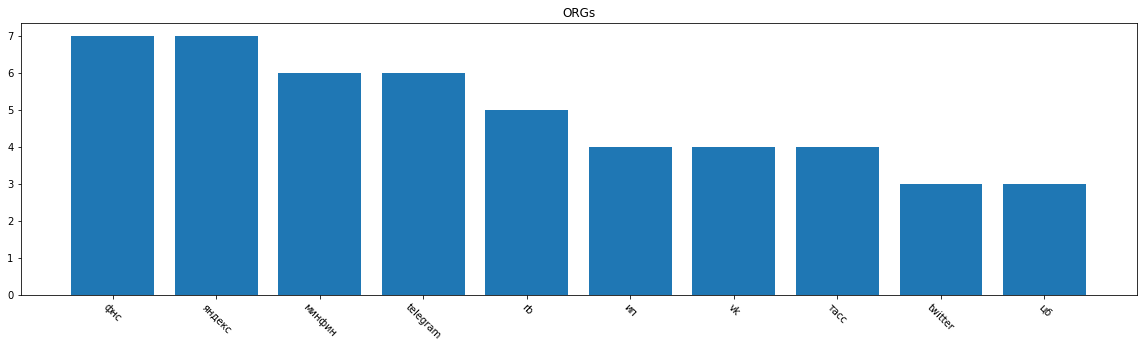

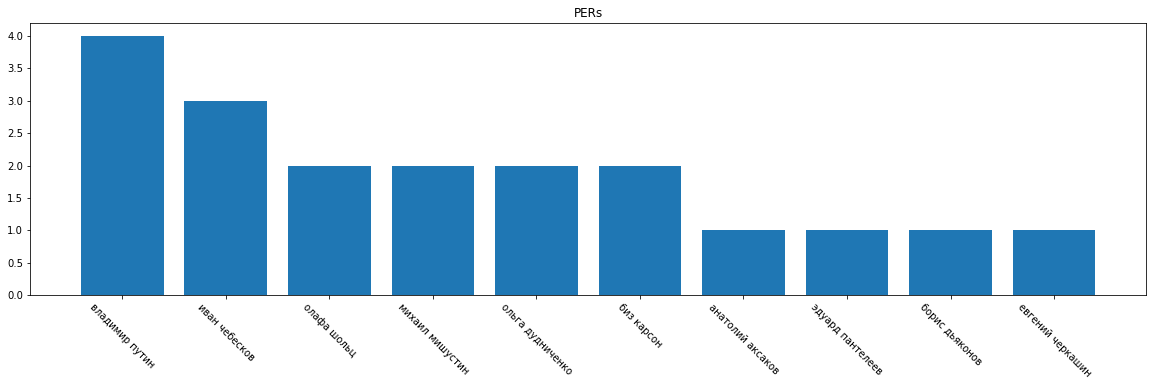

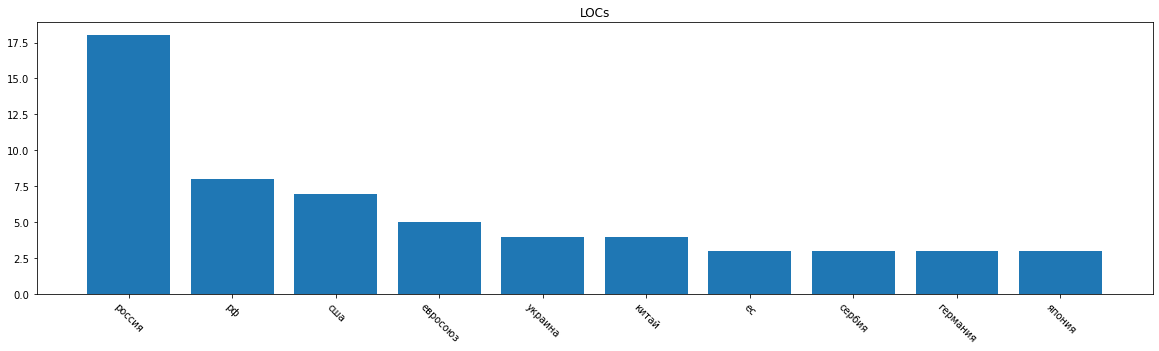

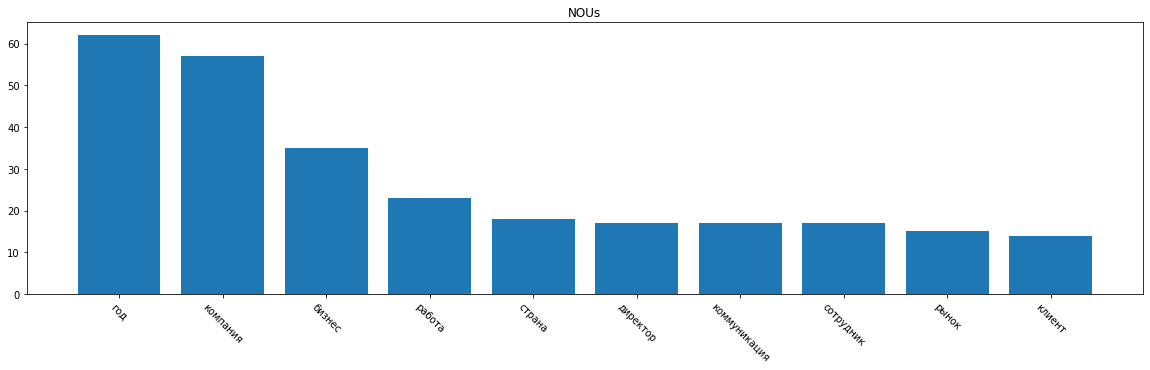

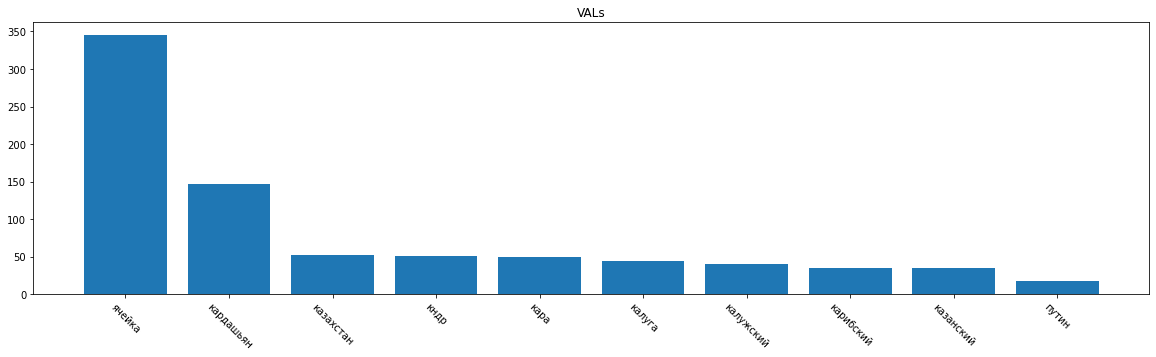

In [65]:
# plot general trends
print("info: GetTrends start...")

def plot_trends(trends: list[dict[str,int]]):
    import matplotlib.pyplot as plt
    for ner_type, trend in zip(['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs'], trends):
        plt.figure(figsize=(20, 5))
        plt.title(ner_type)
        plt.bar(list(trend.keys())[:10], list(trend.values())[:10])
        plt.xticks(rotation=-45)
        plt.show()

plot_trends(trends)

In [15]:

import os
import requests
from pathlib import Path
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import pymorphy2
from razdel import tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

from navec import Navec
from slovnet import NER
from natasha import (
    Segmenter,
    NewsEmbedding,
    NewsMorphTagger,
    Doc
)

import feedparser

# SOURCES = {
#     # Habr
#     # 'habr': 'https://habr.com/ru/rss/all/all/?fl=ru',

#     # Rubase
#     ## By companies
#     # 'rb_chance': "https://rb.ru/feeds/tag/chance/",
#     # 'rb_vk': "https://rb.ru/feeds/tag/vk/",
#     'rb_rvc': "https://rb.ru/feeds/tag/rvc/",
#     # 'rb_yandex': "https://rb.ru/feeds/tag/yandex/",
#     'rb_skolkovo': "https://rb.ru/feeds/tag/skolkovo/",
#     # 'rb_facebook': "https://rb.ru/feeds/tag/facebook/",
#     'rb_mailru': "https://rb.ru/feeds/tag/mailru/",
#     # 'rb_microsoft': "https://rb.ru/feeds/tag/microsoft/",

#     ## By topics
#     'rb_advertising': "https://rb.ru/feeds/tag/advertising/",
#     # 'rb_robotics': "https://rb.ru/feeds/tag/robotics/",
#     # 'rb_it': "https://rb.ru/feeds/tag/it/",
#     # 'rb_bigdata': "https://rb.ru/feeds/tag/bigdata/",
#     'rb_china': "https://rb.ru/feeds/tag/china/",
#     'rb_finance': "https://rb.ru/feeds/tag/fintech/",
#     # 'rb_cloud': "https://rb.ru/feeds/tag/cloud/",

#     # Vedomosti
#     # 'vd_business': "https://www.vedomosti.ru/rss/rubric/business",
#     # 'vd_it_business': "https://www.vedomosti.ru/rss/rubric/it_business",
#     # 'vd_finance': "https://www.vedomosti.ru/rss/rubric/finance",
#     # 'vd_opinion': "https://www.vedomosti.ru/rss/rubric/opinion",
#     # 'vd_analytics': "https://www.vedomosti.ru/rss/rubric/opinion/analytics",


#     # RT
#     # 'rt': "https://russian.rt.com/rss/",
# }


SOURCES = {
    # "rt": "https://russian.rt.com/rss",
    "vd": "https://www.vedomosti.ru/rss/news",

    # for buhgalter
    "buh": "https://buh.ru/rss/?chanel=news",
    "klerk": "https://www.klerk.ru/export/news.rss",
    "audit-it": "http://www.audit-it.ru/rss/news_all.xml",
    # "rb": "https://rb.ru/feeds/all/",

    # for business owner
    # "rb": "https://rb.ru/feeds/all/",
    "rb_pr": "https://rb.ru/feeds/tag/pr/",
    "rb_finance": "https://rb.ru/feeds/tag/fintech/",
    "rb_hr": "https://rb.ru/feeds/tag/hr/",
    "rb_crypto": "https://rb.ru/feeds/tag/crypto/",
    "rb_marketing": "https://rb.ru/feeds/tag/marketing/",
    "rmblr_finance": "https://finance.rambler.ru/rss/economics/",
    "rmblr_business": "https://finance.rambler.ru/rss/business/",
    "rmblr_markets": "https://finance.rambler.ru/rss/markets/",
}

rb_topics = {
    "rb_pr":"PR",
    "rb_finance":"Финансы",
    "rb_hr":"HR",
    "rb_crypto":"Криптовалюты",
    "rb_marketing":"Маркетинг",
}

class RSSParser:
    def __init__(self, sources: dict[str,str]):
        self.sources = sources

    def fetch_entries(self) -> list[dict]:
        entries = []
        for source, url in self.sources.items():
            feed = feedparser.parse(url)
            # If there is no tags for entries, skip source and print warning
            if not feed['entries'][0].get('tags') and source not in rb_topics:
                print(f"Warning: No tags for source {source}")
                continue

            for entry in feed['entries']:
                entry['source'] = source
                entries.append(entry)
        return entries

    def standardize_general(self, entry: dict) -> dict:
        """ Turns entry to a standardized format

        Args:
            entry (dict): entry from feedparser

        Returns:
            dict: standardized entry in a format:
        {
            'source': str,
            'title': str,
            'url':  str,
            'date': timestamp with zone,
            'tags': list[str],
            'text': str,
        }
        """
        entry =  {
            'source': entry['source'],
            'title': entry['title'].replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').strip(),
            'url':  entry['link'],
            'date': entry['published_parsed'],
            'tags': [tag['term'] for tag in entry['tags']] if 'tags' in entry else [rb_topics[entry['source']]] if entry['source'] in rb_topics else [],
            'text': entry['summary'] if 'summary' in entry else '',
        }
        # pprint(entry)

        return entry

    def get_last_standardized_news(self) -> list[dict]:
        entries = self.fetch_entries()
        return [self.standardize_general(entry) for entry in entries]

class NERParser:
    def __init__(self, navec_weights: str, ner_weights: str) -> None:
        self.navec = Navec.load(navec_weights)
        self.ner = NER.load(ner_weights)
        self.ner.navec(self.navec)
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)
        self.segmenter = Segmenter()

    def get_ners_dict(self, text: str) -> dict:
        """ Returns a dictionary of named entities in a text
            Args:
                text (str): text to parse
                ner_model (slovnet.NER): ner model

            Returns:
                dict: dictionary of named entities in a text
            """
            # Use this function with pandarallel's parallel_apply
        if not text:
            return {'ORGs': [], 'PERs': [], 'LOCs': [], 'NOUs': []}
        markup = self.ner(text)
        ORGS, PERS, LOCS = [], [], []
        for span in markup.spans:
            span_text = markup.text[span.start:span.stop]
            {
                'ORG': ORGS,
                'PER': PERS,
                'LOC': LOCS,

            }[span.type].append(span_text)
            # print(span.type, span_text)
        # Получить существительные из текста
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        nouns = [_.text for _ in doc.tokens if _.pos == 'NOUN']
        # print(nouns)
        return {'ORGs': ORGS if ORGS else [], 'PERs': PERS if PERS else [], 'LOCs': LOCS if LOCS else [], 'NOUs': nouns}




ner = NERParser(
    r"S:\Workspace\MORETECH\nlp-workbench\models\navec_news_v1_1B_250K_300d_100q.tar",
    r"S:\Workspace\MORETECH\nlp-workbench\models\slovnet_ner_news_v1.tar",
)


nltk.download('punkt')
url_stopwords_ru = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"

# https://ru.stackoverflow.com/questions/995616/%D0%9A%D0%B0%D0%BA-%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C-tf-idf-%D0%B4%D0%BB%D1%8F-%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2

def get_text(url, encoding='utf-8', to_lower=True):
    url = str(url)
    if url.startswith('http'):
        r = requests.get(url)
        if not r.ok:
            r.raise_for_status()
        return r.text.lower() if to_lower else r.text
    elif os.path.exists(url):
        with open(url, encoding=encoding) as f:
            return f.read().lower() if to_lower else f.read()
    else:
        raise Exception('parameter [url] can be either URL or a filename')

stopwords_ru = get_text(url_stopwords_ru).splitlines()


def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]


def remove_stopwords(tokens, stopwords=None, min_length=4):
    if not stopwords:
        return tokens
    stopwords = set(stopwords)
    tokens = [tok
              for tok in tokens
              if tok not in stopwords and len(tok) >= min_length]
    return tokens


def tokenize_n_lemmatize(
    text, stopwords=None, normalize=True,
    regexp=r'(?u)\b\w{4,}\b'):
    words = [w for sent in sent_tokenize(text)
             for w in regexp_tokenize(sent, regexp)]
    if normalize:
        words = normalize_tokens(words)
    if stopwords:
        words = remove_stopwords(words, stopwords)
    return words

import pandas as pd
# from scripts.ner_parser import NERParser
# from scripts.rss_parser import RSSParser, SOURCES
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    Doc
)

class Lemmatizer:
    def __init__(self) -> None:
        self.segmenter = Segmenter()
        self.morph_vocab = MorphVocab()
        self.emb = NewsEmbedding()
        self.morph_tagger = NewsMorphTagger(self.emb)


    def lemmatize(self, text: str) -> list[str]:
        """ Lemmatizes a text
        Args:
            text (str): text to lemmatize

        Returns:
            list[str]: list of lemmas
        """
        # Use this function with pandarallel's parallel_apply
        doc = Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        for token in doc.tokens:
            token.lemmatize(self.morph_vocab)
        return [_.lemma for _ in doc.tokens]


def make_lemmatize(lemmatizer: Lemmatizer):
    def lemmatize_word(word: str) -> str:
        # Название в два слова должно остаться названием в два слова
        if len(word.split(' ')) > 1:
            return ' '.join([ lemmatizer.lemmatize(word)[0] for word in word.split(' ') ])
        else:
            return lemmatizer.lemmatize(word)[0]

    return lemmatize_word



def get_best_ranked_words(x: str, fitted_vectorizer, n:int) -> list[str]:
    # Use TF-IDF to get best ranked words
    # Conactenate all words in one list
    # Split into words with razdel
    x = tokenize_n_lemmatize(x, stopwords=stopwords_ru)
    # Get TF-IDF matrix
    X = fitted_vectorizer.transform(x)
    # Get TF-IDF values
    tfidf = X.toarray()
    # Get words
    words = fitted_vectorizer.get_feature_names()
    # Get best ranked words
    best_ranked_words = [words[i] for i in tfidf.argsort()[0][-n:]]
    return best_ranked_words

# def get_trends(news_: pd.DataFrame, ner: NERParser, lemmatizer: Lemmatizer) -> pd.DataFrame:
def get_trends(news_: list[dict[str,str]], ner: NERParser, lemmatizer: Lemmatizer, convert_to_df: bool = True) -> list[dict[str, int]]:
    """ Get trends from news"""
    news = news_.copy()
    if convert_to_df:
        news = sorted(news, key=lambda x: x['date'], reverse=True)
        news = pd.DataFrame(news)

    # 1. Get NERs and nouns
    news['ners'] = news['text'].apply(ner.get_ners_dict)

    # 2. Split extracted words
    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs']:
        news[ner_type] = news['ners'].apply(lambda x: x[ner_type])

    # 2.1 Add fifth column - VALs - put 3 best ranked word from extracted words on TF-IDF
    print("Vectorizer...")
    vectorizer = TfidfVectorizer(stop_words=stopwords_ru)
    corpus = news['title'].tolist()
    # Prepare corpus
    corpus = [tokenize_n_lemmatize(text, stopwords=stopwords_ru) for text in corpus]

    # Concat words in to sentences in corpus
    corpus = [' '.join(text) for text in corpus]

    # Fit vectorizer
    print("Vectorizer fitting on corpus len = ", len(corpus))
    vectorizer.fit_transform(corpus)
    print("Vectorizer fitted!")

    print("Vectorize hajimeru!")
    news['VALs'] = news['title'].apply(lambda x: get_best_ranked_words(x, vectorizer, 3))
    print("Vectorize owaru!")

    # 3. Lemmatize extracted words
    lemmatize_word = make_lemmatize(lemmatizer)
    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs']:
        news[ner_type] = news[ner_type].apply(lambda x: [lemmatize_word(word) for word in x])

    # 4. Get trends
    trends = []

    for ner_type in ['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs']:
        trends.append(
            news[ner_type].explode().value_counts().to_dict()
        )

    return trends

def get_trends_by_tag(news_: list[dict[str,str]], tags:list[str],  ner: NERParser, lemmatizer: Lemmatizer):
    """ Get trends from news"""
    news = news_.copy()
    news = sorted(news, key=lambda x: x['date'], reverse=True)
    news = pd.DataFrame(news)

    # 0. Filter by tags
    news = news[news['tags'].apply(lambda x: len(set(x) & set(tags)) > 0)]

    # 1. Pass df to get_trends
    return get_trends(news, ner, lemmatizer, convert_to_df=False)


lemmatizer = Lemmatizer()
parser = RSSParser(
    sources=SOURCES,
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# try to get trends from news
news = parser.get_last_standardized_news()
trends = get_trends(news, ner, lemmatizer)
# plot general trends
print("info: GetTrends start...")

def plot_trends(trends: list[dict[str,int]]):
    import matplotlib.pyplot as plt
    for ner_type, trend in zip(['ORGs', 'PERs', 'LOCs', 'NOUs', 'VALs'], trends):
        plt.figure(figsize=(20, 5))
        plt.title(ner_type)
        plt.bar(list(trend.keys())[:10], list(trend.values())[:10])
        plt.xticks(rotation=-45)
        plt.show()

plot_trends(trends)


Vectorizer...
